# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Functions

In [2]:
def add_value_labels(ax, spacing=5):
    # Função adaptada do Stak Oveflow no link: https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart
    # Esta função adiciona os value labels acima da barra no gráfico abaixo

    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
            

            
def player_rating(name, df):
    rating = []
    for index in range(len(df)):
        if df['white_player'][index] == name:
            rating.append([pd.to_datetime(df['createdAt'][index]).date(), df['speed'][index], df['rating'][index]])
        else:
            rating.append([pd.to_datetime(df['createdAt'][index]).date(), df['speed'][index], df['rating.1'][index]])
    return rating


def clean_rating(df):
    """Cleans the comma from rating column in df"""
    comma = [x[0:-1] if x[-1] ==',' else x for x in df.rating]
    return comma
    

def first_move(dataframe):
    """This function returns a list with the pawn opening. For this classification
    was created four categories of pawn opening: king pawn, queen pawn, english opening and others"""
    first = []
    for item in range(len(dataframe)):
        if dataframe.moves[item][0:2] == 'e4':
            first.append('king pawn')
        elif dataframe.moves[item][0:2] == 'd4':
            first.append('queen pawn')
        elif dataframe.moves[item][0:2] == 'c4':
            first.append('english opening')
        else:
            first.append( 'others')
    return first

# Reading Data

In [3]:
df = pd.read_csv('game_data.csv')
df.drop('Unnamed: 0', axis = 'columns', inplace=True)
df

,rated,variant,speed,perf,createdAt,status,winner,moves,clocks,clock,ECO,opening_name,white_player,rating,black_player,rating.1
0,True,standard,blitz,blitz,2023-05-17 23:46:19.902000+00:00,resign,white,e4 e5 Nf3 d6 Bc4 h6 O-O Nf6 Re1 Nc6 c3 Na5 Bb5...,"[30003, 30003, 29947, 29803, 28979, 29651, 283...","{'initial': 300, 'increment': 0, 'totalTime': ...",C41,Philidor Defense,'chestroyer',1440,'kimura4',1393
1,True,standard,blitz,blitz,2023-05-17 23:43:32.743000+00:00,mate,black,e4 c5 Nf3 e6 d4 cxd4 Nxd4 Nc6 Nxc6 bxc6 Bc4 d5...,"[30003, 30003, 29883, 29723, 29883, 29547, 298...","{'initial': 300, 'increment': 0, 'totalTime': ...",B44,Sicilian Defense: Taimanov Variation,'kimura4',1398,'chestroyer',1435
2,True,standard,blitz,blitz,2023-05-17 23:33:19.245000+00:00,resign,black,e4 e5 Nf3 d6 d4 Nd7 Bc4 h6 O-O Ngf6 Re1 Qe7 Nc...,"[30003, 30003, 29923, 29851, 29771, 29571, 295...","{'initial': 300, 'increment': 0, 'totalTime': ...",C41,Philidor Defense: Hanham Variation,'chestroyer',1441,'kimura4',1391
3,True,standard,blitz,blitz,2023-05-17 23:28:00.728000+00:00,resign,black,e4 e5 Nf3 Nc6 Bc4 Nf6 d4 exd4 O-O Bc5 Re1 O-O ...,"[30003, 30003, 29827, 29795, 29715, 29379, 295...","{'initial': 300, 'increment': 0, 'totalTime': ...",C55,"Italian Game: Scotch Gambit, Max Lange Attack",'joservega',1465,'chestroyer',1435
4,True,standard,blitz,blitz,2023-05-17 23:14:03.641000+00:00,mate,white,e4 e5 Nf3 d6 d4 exd4 Bc4 Nf6 Qd3 Be7 c3 dxc3 N...,"[30003, 30003, 29915, 29883, 29755, 29611, 293...","{'initial': 300, 'increment': 0, 'totalTime': ...",C41,Philidor Defense: Morphy Gambit,'chestroyer',1429,'bmore1008',1425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,True,standard,rapid,rapid,2019-04-15 22:12:18.221000+00:00,timeout,white,e4 c5 Bc4 e6 e5 d5 Bb5+ Bd7 Bxd7+ Nxd7 c3 Nxe5...,"[60003, 60003, 59699, 58627, 59107, 56163, 581...","{'initial': 600, 'increment': 0, 'totalTime': ...",B20,Sicilian Defense: Bowdler Attack,'t-2wadbee-t',1241,'chestroyer',1241
1648,True,standard,blitz,blitz,2019-04-13 20:54:06.845000+00:00,resign,black,c4 Nf6 Nc3 g6 g3 Bg7 Bg2 O-O e4 Re8 d3 d6 Nf3 ...,"[18003, 18003, 17579, 18003, 17419, 17963, 172...","{'initial': 180, 'increment': 0, 'totalTime': ...",A16,"English Opening: Anglo-Indian Defense, Queen's...",'chestroyer',1500,'dancab07',1506
1649,True,standard,rapid,rapid,2019-04-13 20:43:08.889000+00:00,mate,white,e4 c6 d4 d5 e5 e6 Nf3 Ne7 Nc3 Nd7 Bd3 f6 O-O N...,"[60003, 60003, 58923, 59843, 58747, 59355, 584...","{'initial': 600, 'increment': 0, 'totalTime': ...",B12,Caro-Kann Defense: Advance Variation,'emerson88',1386,'chestroyer',1346
1650,True,standard,rapid,rapid,2019-04-12 02:55:21.683000+00:00,mate,white,e4 c6 Bc4 d5 exd5 cxd5 Bb3 Bf5 d4 e6 h3 Nc6 c3...,"[60003, 60003, 59787, 59715, 59619, 59547, 595...","{'initial': 600, 'increment': 0, 'totalTime': ...",B10,Caro-Kann Defense: Hillbilly Attack,'cyote',1546,'chestroyer',1500


In [4]:
df.describe()

,rated,variant,speed,perf,createdAt,status,winner,moves,clocks,clock,ECO,opening_name,white_player,rating,black_player,rating.1
count,1652,1652,1652,1652,1652,1652,1593,1652,1650,1650,1652,1652,1652,1652,1652,1652
unique,2,2,5,5,1652,6,2,1652,1650,18,174,402,819,648,807,640
top,True,standard,blitz,blitz,2023-05-17 23:46:19.902000+00:00,mate,white,e4 e5 Nf3 d6 Bc4 h6 O-O Nf6 Re1 Nc6 c3 Na5 Bb5...,"[30003, 30003, 29947, 29803, 28979, 29651, 283...","{'initial': 300, 'increment': 0, 'totalTime': ...",B20,Sicilian Defense,'chestroyer',1500,'chestroyer',1435
freq,1641,1646,906,906,1,657,857,1,1,409,95,63,822,16,830,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rated         1652 non-null   bool  
 1   variant       1652 non-null   object
 2   speed         1652 non-null   object
 3   perf          1652 non-null   object
 4   createdAt     1652 non-null   object
 5   status        1652 non-null   object
 6   winner        1593 non-null   object
 7   moves         1652 non-null   object
 8   clocks        1650 non-null   object
 9   clock         1650 non-null   object
 10  ECO           1652 non-null   object
 11  opening_name  1652 non-null   object
 12  white_player  1652 non-null   object
 13  rating        1652 non-null   object
 14  black_player  1652 non-null   object
 15  rating.1      1652 non-null   object
dtypes: bool(1), object(15)
memory usage: 195.3+ KB


In [6]:
df['pawn_opening'] = first_move(df)
df

,rated,variant,speed,perf,createdAt,status,winner,moves,clocks,clock,ECO,opening_name,white_player,rating,black_player,rating.1,pawn_opening
0,True,standard,blitz,blitz,2023-05-17 23:46:19.902000+00:00,resign,white,e4 e5 Nf3 d6 Bc4 h6 O-O Nf6 Re1 Nc6 c3 Na5 Bb5...,"[30003, 30003, 29947, 29803, 28979, 29651, 283...","{'initial': 300, 'increment': 0, 'totalTime': ...",C41,Philidor Defense,'chestroyer',1440,'kimura4',1393,king pawn
1,True,standard,blitz,blitz,2023-05-17 23:43:32.743000+00:00,mate,black,e4 c5 Nf3 e6 d4 cxd4 Nxd4 Nc6 Nxc6 bxc6 Bc4 d5...,"[30003, 30003, 29883, 29723, 29883, 29547, 298...","{'initial': 300, 'increment': 0, 'totalTime': ...",B44,Sicilian Defense: Taimanov Variation,'kimura4',1398,'chestroyer',1435,king pawn
2,True,standard,blitz,blitz,2023-05-17 23:33:19.245000+00:00,resign,black,e4 e5 Nf3 d6 d4 Nd7 Bc4 h6 O-O Ngf6 Re1 Qe7 Nc...,"[30003, 30003, 29923, 29851, 29771, 29571, 295...","{'initial': 300, 'increment': 0, 'totalTime': ...",C41,Philidor Defense: Hanham Variation,'chestroyer',1441,'kimura4',1391,king pawn
3,True,standard,blitz,blitz,2023-05-17 23:28:00.728000+00:00,resign,black,e4 e5 Nf3 Nc6 Bc4 Nf6 d4 exd4 O-O Bc5 Re1 O-O ...,"[30003, 30003, 29827, 29795, 29715, 29379, 295...","{'initial': 300, 'increment': 0, 'totalTime': ...",C55,"Italian Game: Scotch Gambit, Max Lange Attack",'joservega',1465,'chestroyer',1435,king pawn
4,True,standard,blitz,blitz,2023-05-17 23:14:03.641000+00:00,mate,white,e4 e5 Nf3 d6 d4 exd4 Bc4 Nf6 Qd3 Be7 c3 dxc3 N...,"[30003, 30003, 29915, 29883, 29755, 29611, 293...","{'initial': 300, 'increment': 0, 'totalTime': ...",C41,Philidor Defense: Morphy Gambit,'chestroyer',1429,'bmore1008',1425,king pawn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,True,standard,rapid,rapid,2019-04-15 22:12:18.221000+00:00,timeout,white,e4 c5 Bc4 e6 e5 d5 Bb5+ Bd7 Bxd7+ Nxd7 c3 Nxe5...,"[60003, 60003, 59699, 58627, 59107, 56163, 581...","{'initial': 600, 'increment': 0, 'totalTime': ...",B20,Sicilian Defense: Bowdler Attack,'t-2wadbee-t',1241,'chestroyer',1241,king pawn
1648,True,standard,blitz,blitz,2019-04-13 20:54:06.845000+00:00,resign,black,c4 Nf6 Nc3 g6 g3 Bg7 Bg2 O-O e4 Re8 d3 d6 Nf3 ...,"[18003, 18003, 17579, 18003, 17419, 17963, 172...","{'initial': 180, 'increment': 0, 'totalTime': ...",A16,"English Opening: Anglo-Indian Defense, Queen's...",'chestroyer',1500,'dancab07',1506,english opening
1649,True,standard,rapid,rapid,2019-04-13 20:43:08.889000+00:00,mate,white,e4 c6 d4 d5 e5 e6 Nf3 Ne7 Nc3 Nd7 Bd3 f6 O-O N...,"[60003, 60003, 58923, 59843, 58747, 59355, 584...","{'initial': 600, 'increment': 0, 'totalTime': ...",B12,Caro-Kann Defense: Advance Variation,'emerson88',1386,'chestroyer',1346,king pawn
1650,True,standard,rapid,rapid,2019-04-12 02:55:21.683000+00:00,mate,white,e4 c6 Bc4 d5 exd5 cxd5 Bb3 Bf5 d4 e6 h3 Nc6 c3...,"[60003, 60003, 59787, 59715, 59619, 59547, 595...","{'initial': 600, 'increment': 0, 'totalTime': ...",B10,Caro-Kann Defense: Hillbilly Attack,'cyote',1546,'chestroyer',1500,king pawn


In [7]:
player_name = "'chestroyer'"

## Statistical Distributions

In [8]:
df.columns
columns_of_interest = ['rated', 'speed', 'status', 'winner', 'pawn_opening', 'ECO', 'opening_name', 'moves']
for column in columns_of_interest:
    print('-'*120)
    print(f'{column} analysis:\n{df[column].value_counts()}')

------------------------------------------------------------------------------------------------------------------------
rated analysis:
True     1641
False      11
Name: rated, dtype: int64
------------------------------------------------------------------------------------------------------------------------
speed analysis:
blitz             906
classical         321
rapid             231
bullet            192
correspondence      2
Name: speed, dtype: int64
------------------------------------------------------------------------------------------------------------------------
status analysis:
mate         657
resign       502
outoftime    374
timeout       61
draw          30
stalemate     28
Name: status, dtype: int64
------------------------------------------------------------------------------------------------------------------------
winner analysis:
white    857
black    736
Name: winner, dtype: int64
------------------------------------------------------------------------------

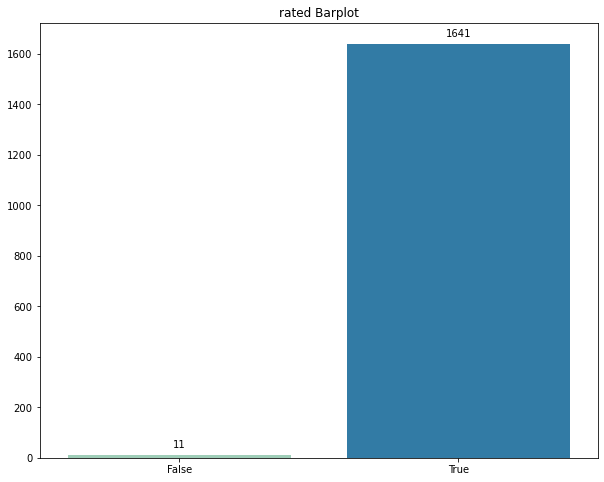

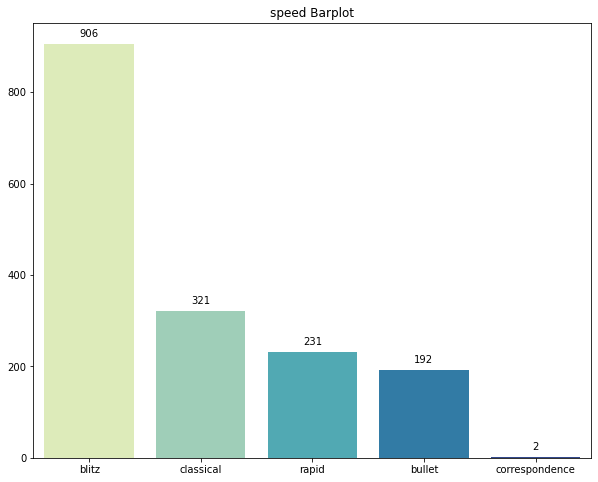

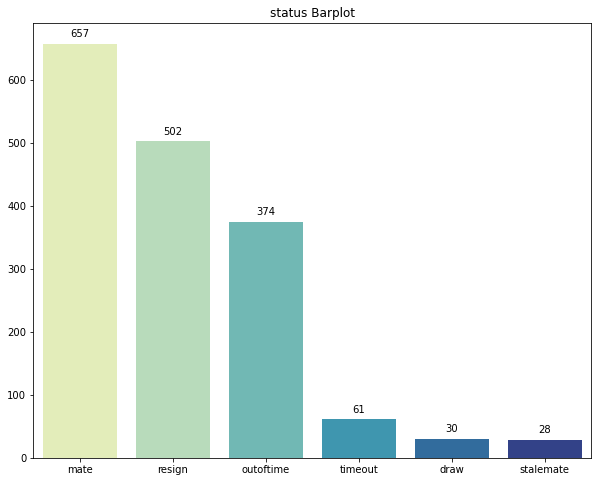

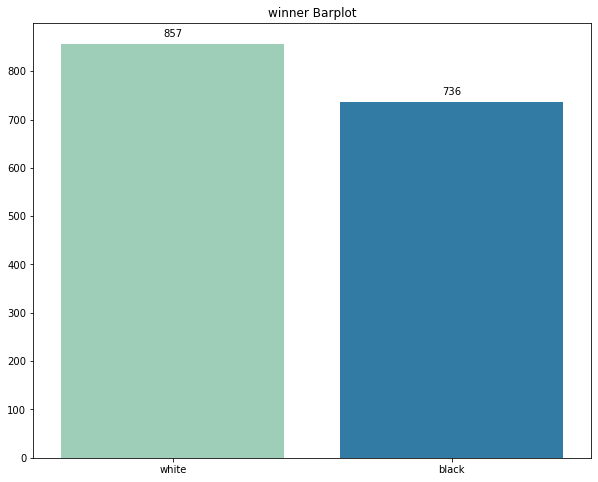

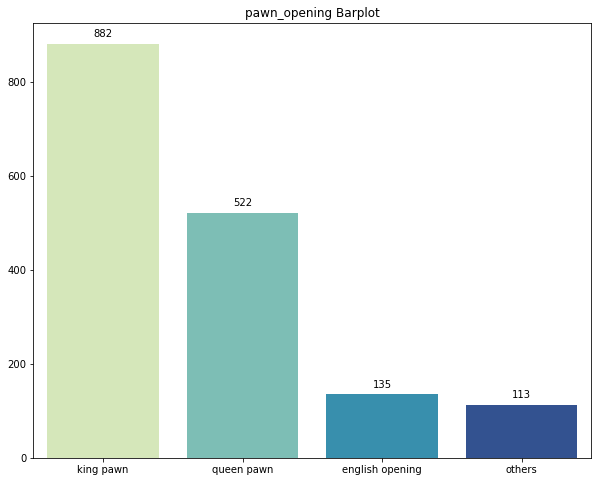

In [9]:
for column in columns_of_interest[0:5]:
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.barplot(x= df[column].value_counts().index, y=df[column].value_counts().values, palette='YlGnBu', ax=ax)
    plt.title(f'{column} Barplot')
    add_value_labels(ax)

# Gameplay Style

## Playing as White

In [10]:
playing_white = df.loc[df['white_player'] == player_name, :]
playing_white

,rated,variant,speed,perf,createdAt,status,winner,moves,clocks,clock,ECO,opening_name,white_player,rating,black_player,rating.1,pawn_opening
0,True,standard,blitz,blitz,2023-05-17 23:46:19.902000+00:00,resign,white,e4 e5 Nf3 d6 Bc4 h6 O-O Nf6 Re1 Nc6 c3 Na5 Bb5...,"[30003, 30003, 29947, 29803, 28979, 29651, 283...","{'initial': 300, 'increment': 0, 'totalTime': ...",C41,Philidor Defense,'chestroyer',1440,'kimura4',1393,king pawn
2,True,standard,blitz,blitz,2023-05-17 23:33:19.245000+00:00,resign,black,e4 e5 Nf3 d6 d4 Nd7 Bc4 h6 O-O Ngf6 Re1 Qe7 Nc...,"[30003, 30003, 29923, 29851, 29771, 29571, 295...","{'initial': 300, 'increment': 0, 'totalTime': ...",C41,Philidor Defense: Hanham Variation,'chestroyer',1441,'kimura4',1391,king pawn
4,True,standard,blitz,blitz,2023-05-17 23:14:03.641000+00:00,mate,white,e4 e5 Nf3 d6 d4 exd4 Bc4 Nf6 Qd3 Be7 c3 dxc3 N...,"[30003, 30003, 29915, 29883, 29755, 29611, 293...","{'initial': 300, 'increment': 0, 'totalTime': ...",C41,Philidor Defense: Morphy Gambit,'chestroyer',1429,'bmore1008',1425,king pawn
6,True,standard,blitz,blitz,2023-05-17 01:07:07.762000+00:00,mate,white,e4 d5 exd5 Qxd5 Nc3 Qa5 Nf3 Bg4 Be2 Nf6 h3 Bxf...,"[18003, 18003, 17803, 17907, 17803, 17827, 171...","{'initial': 180, 'increment': 0, 'totalTime': ...",B01,Scandinavian Defense: Main Line,'chestroyer',1429,'samgat_kairushev',1436,king pawn
7,True,standard,blitz,blitz,2023-05-16 15:03:28.530000+00:00,resign,black,e4 e5 Nf3 Nf6 Nxe5 Qe7 Nf3 Nxe4 Qe2 Nd6 Qxe7+ ...,"[30003, 30003, 29947, 29891, 29739, 29771, 287...","{'initial': 300, 'increment': 0, 'totalTime': ...",C42,Russian Game,'chestroyer',1435,'schwalbe_01',1429,king pawn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,True,standard,bullet,bullet,2019-04-24 22:38:23.732000+00:00,resign,black,Nf3 Nf6 e4 g6 Bc4 Bg7 d4 O-O Bg5 d6 O-O b6 e5 ...,"[6003, 6003, 5883, 6003, 5699, 5955, 5643, 589...","{'initial': 60, 'increment': 0, 'totalTime': 60}",A05,Zukertort Opening: Lemberger Gambit,'chestroyer',1500,'lordfarsomin',1497,others
1644,True,standard,classical,classical,2019-04-24 13:23:49.627000+00:00,resign,black,Nf3 c5 e4 d6 Bb5+ Bd7 a4 Nc6 O-O g6 d4 cxd4 Nx...,"[90003, 90003, 90955, 91307, 91483, 92539, 921...","{'initial': 900, 'increment': 15, 'totalTime':...",B52,"Sicilian Defense: Moscow Variation, Main Line",'chestroyer',1406,'mateifaibis',1424,others
1646,True,standard,rapid,rapid,2019-04-16 14:24:02.081000+00:00,timeout,white,Nf3 e5 d3 d6 e4 Nf6 Nc3 Be7 h3 O-O Bg5 a5 d4 e...,"[60003, 60003, 59483, 59787, 59283, 59251, 590...","{'initial': 600, 'increment': 0, 'totalTime': ...",A04,Zukertort Opening: Ross Gambit,'chestroyer',1152,'ahmaadd',1060,others
1648,True,standard,blitz,blitz,2019-04-13 20:54:06.845000+00:00,resign,black,c4 Nf6 Nc3 g6 g3 Bg7 Bg2 O-O e4 Re8 d3 d6 Nf3 ...,"[18003, 18003, 17579, 18003, 17419, 17963, 172...","{'initial': 180, 'increment': 0, 'totalTime': ...",A16,"English Opening: Anglo-Indian Defense, Queen's...",'chestroyer',1500,'dancab07',1506,english opening


### Winning rate playing as white

In [11]:
print(playing_white.winner.value_counts())
print('-'*100)
print(playing_white.winner.value_counts(normalize=True)*100)

white    450
black    344
Name: winner, dtype: int64
----------------------------------------------------------------------------------------------------
white    56.675063
black    43.324937
Name: winner, dtype: float64


### Most played openings (ECO and name)

In [12]:
playing_white.ECO.value_counts()

A40    60
D20    46
B01    35
D06    33
C41    33
       ..
C57     1
B90     1
A65     1
C58     1
B52     1
Name: ECO, Length: 124, dtype: int64

In [13]:
playing_white.opening_name.value_counts()

Philidor Defense                                                                     26
Queen's Gambit Declined: Marshall Defense                                            26
English Opening: King's English Variation                                            26
Queen's Pawn Game: Accelerated London System                                         25
Horwitz Defense                                                                      22
                                                                                     ..
French Defense: Exchange Variation                                                    1
English Opening: Anglo-Lithuanian Variation                                           1
English Opening: King's English Variation, Two Knights Variation, Reversed Dragon     1
Rat Defense: Small Center Defense                                                     1
Zukertort Opening: Ross Gambit                                                        1
Name: opening_name, Length: 258,

### Most succesful openings (that resulted in a win)

In [14]:
playing_white.loc[playing_white.winner=='white', 'ECO'].value_counts()

A40    37
D20    24
C41    22
D06    21
B01    19
       ..
D50     1
B10     1
B13     1
A25     1
B29     1
Name: ECO, Length: 89, dtype: int64

In [15]:
playing_white.loc[playing_white.winner=='white', 'opening_name'].value_counts()

Philidor Defense                             19
English Opening: King's English Variation    17
Queen's Gambit Declined: Marshall Defense    15
Sicilian Defense: Alapin Variation           13
Horwitz Defense                              12
                                             ..
Sicilian Defense: Mongoose Variation          1
Philidor Defense: Morphy Gambit               1
Caro-Kann Defense: Exchange Variation         1
Scotch Game: Classical Variation              1
Zukertort Opening: Ross Gambit                1
Name: opening_name, Length: 180, dtype: int64

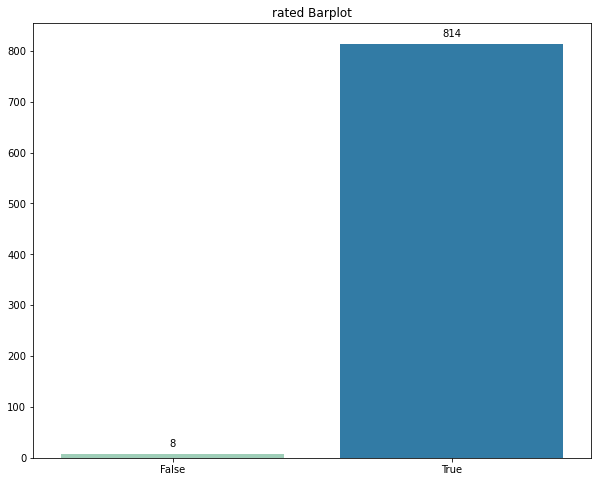

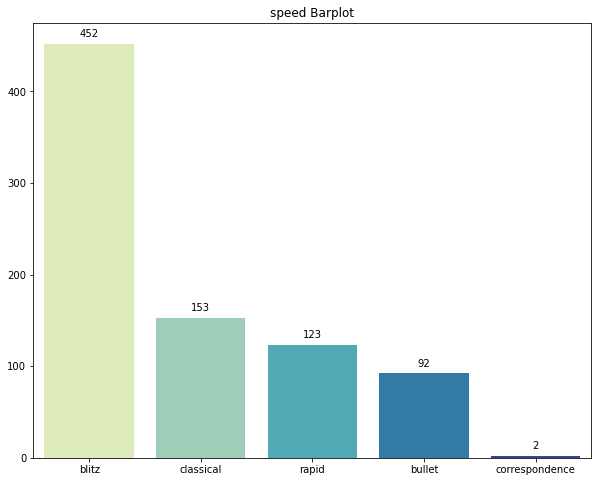

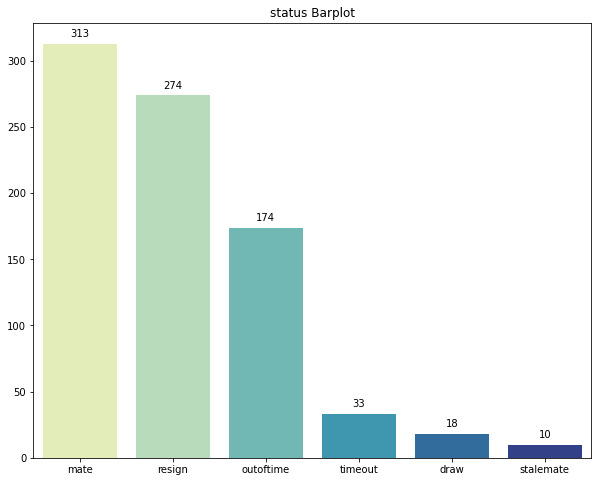

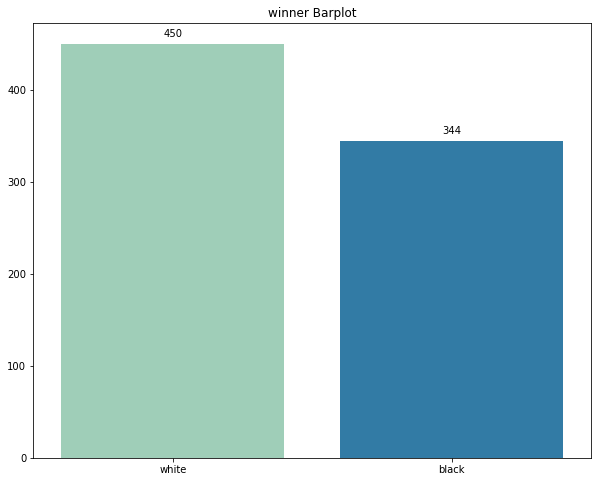

In [16]:
for column in columns_of_interest[0:4]:
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.barplot(x= playing_white[column].value_counts().index, y=playing_white[column].value_counts().values, palette='YlGnBu', ax=ax)
    plt.title(f'{column} Barplot')
    add_value_labels(ax)

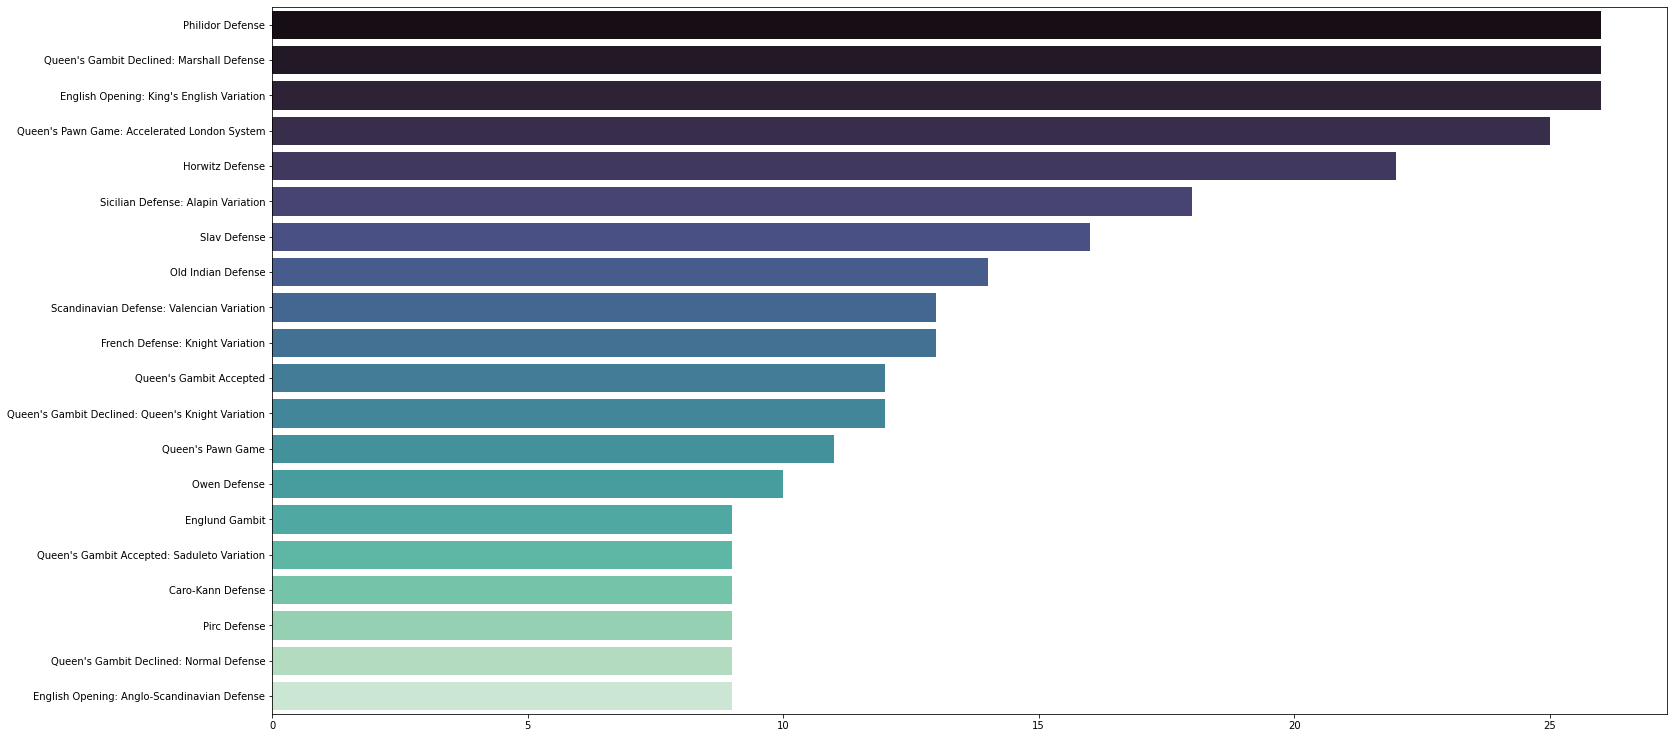

In [17]:
fig, ax = plt.subplots(figsize=(25, 13))
ax = sns.barplot(x=playing_white['opening_name'].value_counts().values[0:20], 
                 y=playing_white['opening_name'].value_counts().index[0:20],
                 palette='mako')

# Playing as Black

In [18]:
playing_black = df.loc[df['black_player'] == player_name, :]
playing_black

,rated,variant,speed,perf,createdAt,status,winner,moves,clocks,clock,ECO,opening_name,white_player,rating,black_player,rating.1,pawn_opening
1,True,standard,blitz,blitz,2023-05-17 23:43:32.743000+00:00,mate,black,e4 c5 Nf3 e6 d4 cxd4 Nxd4 Nc6 Nxc6 bxc6 Bc4 d5...,"[30003, 30003, 29883, 29723, 29883, 29547, 298...","{'initial': 300, 'increment': 0, 'totalTime': ...",B44,Sicilian Defense: Taimanov Variation,'kimura4',1398,'chestroyer',1435,king pawn
3,True,standard,blitz,blitz,2023-05-17 23:28:00.728000+00:00,resign,black,e4 e5 Nf3 Nc6 Bc4 Nf6 d4 exd4 O-O Bc5 Re1 O-O ...,"[30003, 30003, 29827, 29795, 29715, 29379, 295...","{'initial': 300, 'increment': 0, 'totalTime': ...",C55,"Italian Game: Scotch Gambit, Max Lange Attack",'joservega',1465,'chestroyer',1435,king pawn
5,True,standard,blitz,blitz,2023-05-17 03:22:15.321000+00:00,outoftime,white,e4 e5 c3 Nc6 d4 Nf6 Bd3 d5 exd5 Qxd5 Nf3 e4 Bc...,"[18003, 18003, 17835, 17795, 17667, 17307, 173...","{'initial': 180, 'increment': 0, 'totalTime': ...",C20,King's Pawn Game: MacLeod Attack,'mr_god3',1404,'chestroyer',1435,king pawn
8,True,standard,blitz,blitz,2023-05-11 01:48:06.671000+00:00,mate,white,e4 e5 Nf3 Nc6 d4 exd4 Nxd4 Nge7 Bc4 Nxd4 Qxd4 ...,"[30003, 30003, 29931, 29907, 29875, 29483, 298...","{'initial': 300, 'increment': 0, 'totalTime': ...",C45,Scotch Game,'lukman2016',1457,'chestroyer',1441,king pawn
9,True,standard,blitz,blitz,2023-05-11 01:39:29.214000+00:00,resign,black,e4 e5 Nc3 Nc6 b3 Nf6 d3 Bb4 Bb2 Qe7 g3 d6 Bg2 ...,"[30003, 30003, 29803, 29571, 29683, 29331, 295...","{'initial': 300, 'increment': 0, 'totalTime': ...",C25,Vienna Game: Max Lange Defense,'peon4life',1456,'chestroyer',1435,king pawn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,True,standard,classical,classical,2019-04-24 13:33:17.318000+00:00,mate,white,e4 c6 Nf3 d5 e5 e6 g3 Bc5 d4 Bb6 Bg2 Ne7 O-O O...,"[90003, 90003, 91267, 91243, 92523, 92339, 938...","{'initial': 900, 'increment': 15, 'totalTime':...",B10,Caro-Kann Defense,'mateifaibis',1433,'chestroyer',1309,king pawn
1645,True,standard,classical,classical,2019-04-18 11:48:37.237000+00:00,mate,white,e4 c5 Nc3 e6 Nf3 Nc6 d4 a6 d5 Nd4 Nxd4 cxd4 Qx...,"[90003, 90003, 91171, 91019, 92419, 92059, 936...","{'initial': 900, 'increment': 15, 'totalTime':...",B23,Sicilian Defense: Closed,'ma_diamond',1500,'chestroyer',1504,king pawn
1647,True,standard,rapid,rapid,2019-04-15 22:12:18.221000+00:00,timeout,white,e4 c5 Bc4 e6 e5 d5 Bb5+ Bd7 Bxd7+ Nxd7 c3 Nxe5...,"[60003, 60003, 59699, 58627, 59107, 56163, 581...","{'initial': 600, 'increment': 0, 'totalTime': ...",B20,Sicilian Defense: Bowdler Attack,'t-2wadbee-t',1241,'chestroyer',1241,king pawn
1649,True,standard,rapid,rapid,2019-04-13 20:43:08.889000+00:00,mate,white,e4 c6 d4 d5 e5 e6 Nf3 Ne7 Nc3 Nd7 Bd3 f6 O-O N...,"[60003, 60003, 58923, 59843, 58747, 59355, 584...","{'initial': 600, 'increment': 0, 'totalTime': ...",B12,Caro-Kann Defense: Advance Variation,'emerson88',1386,'chestroyer',1346,king pawn


### Winning rate as black

In [19]:
print(playing_black['winner'].value_counts())
print('-'*100)
print(playing_black['winner'].value_counts(normalize=True)*100)

white    407
black    392
Name: winner, dtype: int64
----------------------------------------------------------------------------------------------------
white    50.938673
black    49.061327
Name: winner, dtype: float64


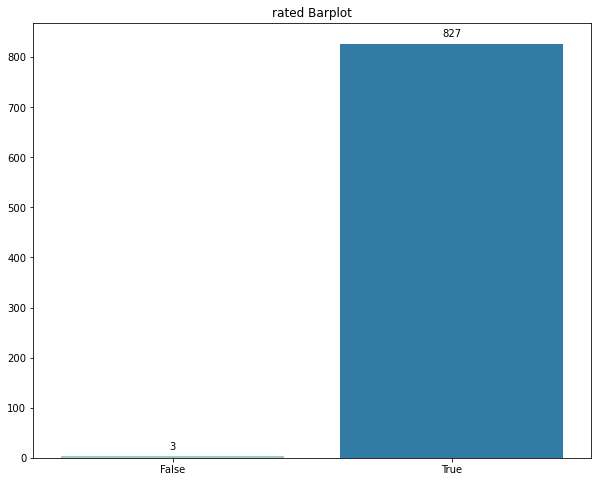

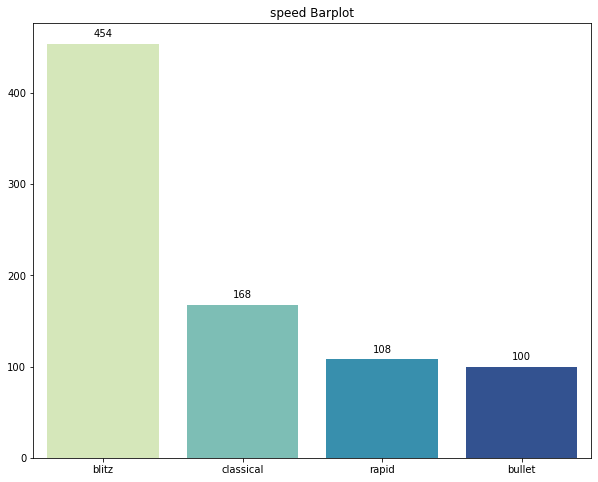

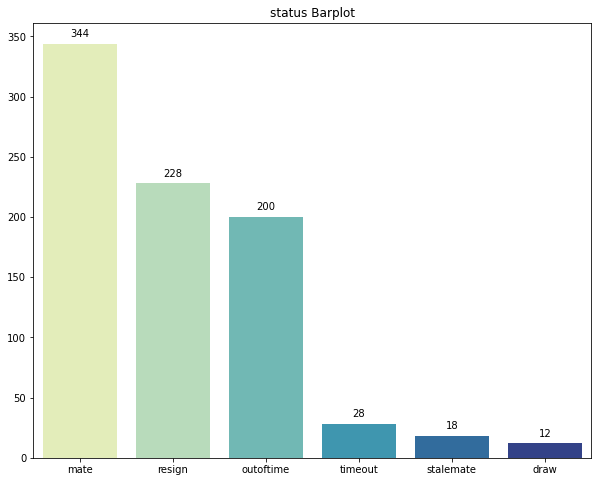

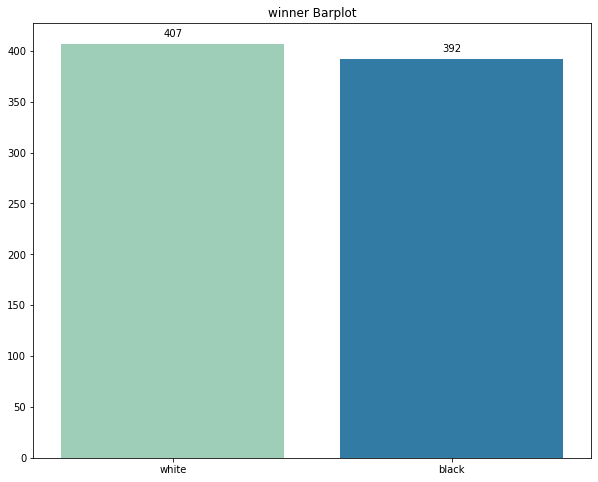

In [20]:
for column in columns_of_interest[0:4]:
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.barplot(x= playing_black[column].value_counts().index, y=playing_black[column].value_counts().values, palette='YlGnBu', ax=ax)
    plt.title(f'{column} Barplot')
    add_value_labels(ax)

### Most played openings as black

In [21]:
playing_black.ECO.value_counts()

B20    90
A45    72
C00    67
B50    58
A00    41
       ..
C34     1
C48     1
C30     1
C25     1
C41     1
Name: ECO, Length: 118, dtype: int64

In [22]:
playing_black.opening_name.value_counts()[0:15]

Sicilian Defense                                         56
Indian Defense                                           55
Sicilian Defense: Bowdler Attack                         41
Sicilian Defense: Modern Variations                      34
French Defense: Knight Variation                         30
Caro-Kann Defense                                        28
Sicilian Defense: Smith-Morra Gambit                     27
Sicilian Defense: Closed                                 26
French Defense                                           14
East Indian Defense                                      13
French Defense: Advance Variation, Nimzowitsch System    13
Van't Kruijs Opening                                     13
Sicilian Defense: French Variation                       13
Hungarian Opening                                        12
French Defense: Advance Variation                        12
Name: opening_name, dtype: int64

In [23]:
strip_opening_b = [str(x).split(':')[0] for x in playing_black.opening_name.value_counts().index]
count_openings_b = [[x, strip_opening_b.count(str(x))] for x in strip_opening_b]
count_openings_unique_b = []

for l in count_openings_b:
    if l not in count_openings_unique_b:
        count_openings_unique_b.append(l)
count_openings_unique_b

[['Sicilian Defense', 42],
 ['Indian Defense', 9],
 ['French Defense', 18],
 ['Caro-Kann Defense', 16],
 ['East Indian Defense', 1],
 ["Van't Kruijs Opening", 1],
 ['Hungarian Opening', 2],
 ['London System', 1],
 ['Trompowsky Attack', 2],
 ["Queen's Pawn Game", 9],
 ["King's Indian Defense", 12],
 ['Nimzo-Larsen Attack', 2],
 ['Grünfeld Defense', 10],
 ['Russian Game', 6],
 ["King's Indian Attack", 1],
 ['Polish Opening', 2],
 ['Four Knights Game', 3],
 ['Scotch Game', 2],
 ['Old Indian Defense', 1],
 ['Pirc Defense', 3],
 ['Englund Gambit Declined', 1],
 ["Bishop's Opening", 3],
 ['Paleface Attack', 1],
 ['Van Geet Opening', 2],
 ['English Opening', 12],
 ['Nimzo-Indian Defense', 1],
 ['Neo-Grünfeld Defense', 3],
 ['Ruy Lopez', 3],
 ['Saragossa Opening', 1],
 ['None', 1],
 ['Mieses Opening', 1],
 ["King's Pawn Game", 5],
 ['Bogo-Indian Defense', 1],
 ["Queen's Gambit Declined", 5],
 ["Queen's Pawn, Mengarini Attack", 1],
 ["Queen's Gambit Accepted", 1],
 ['Benoni Defense', 1],
 ['Tor

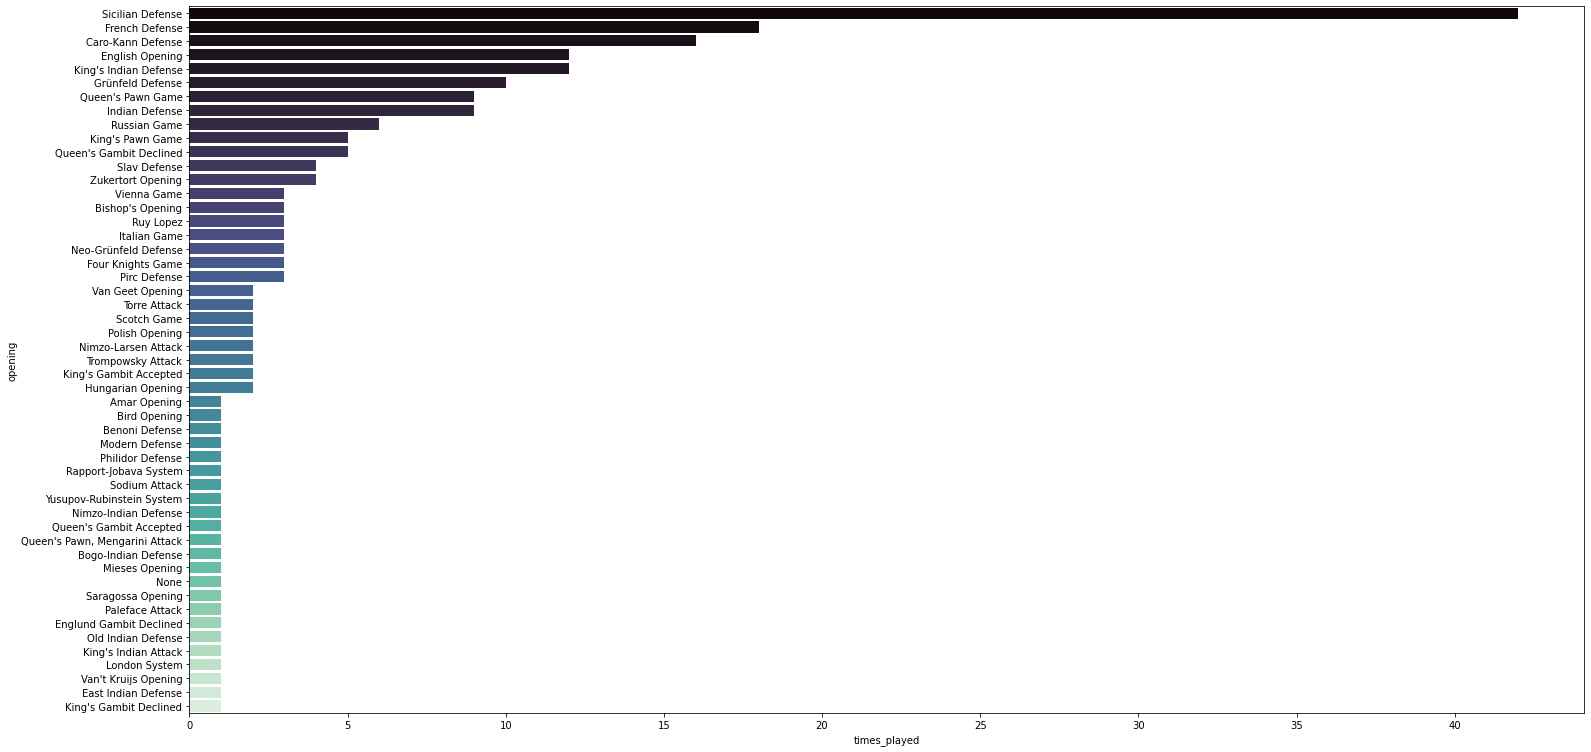

In [24]:
plot_df = pd.DataFrame(count_openings_unique_b, columns=['opening', 'times_played'])
plot_df = plot_df.sort_values(by=['times_played'], ascending=False)

fig, ax = plt.subplots(figsize=(25, 13))
ax = sns.barplot(x=plot_df.times_played, 
                 y=plot_df.opening,
                 palette='mako')

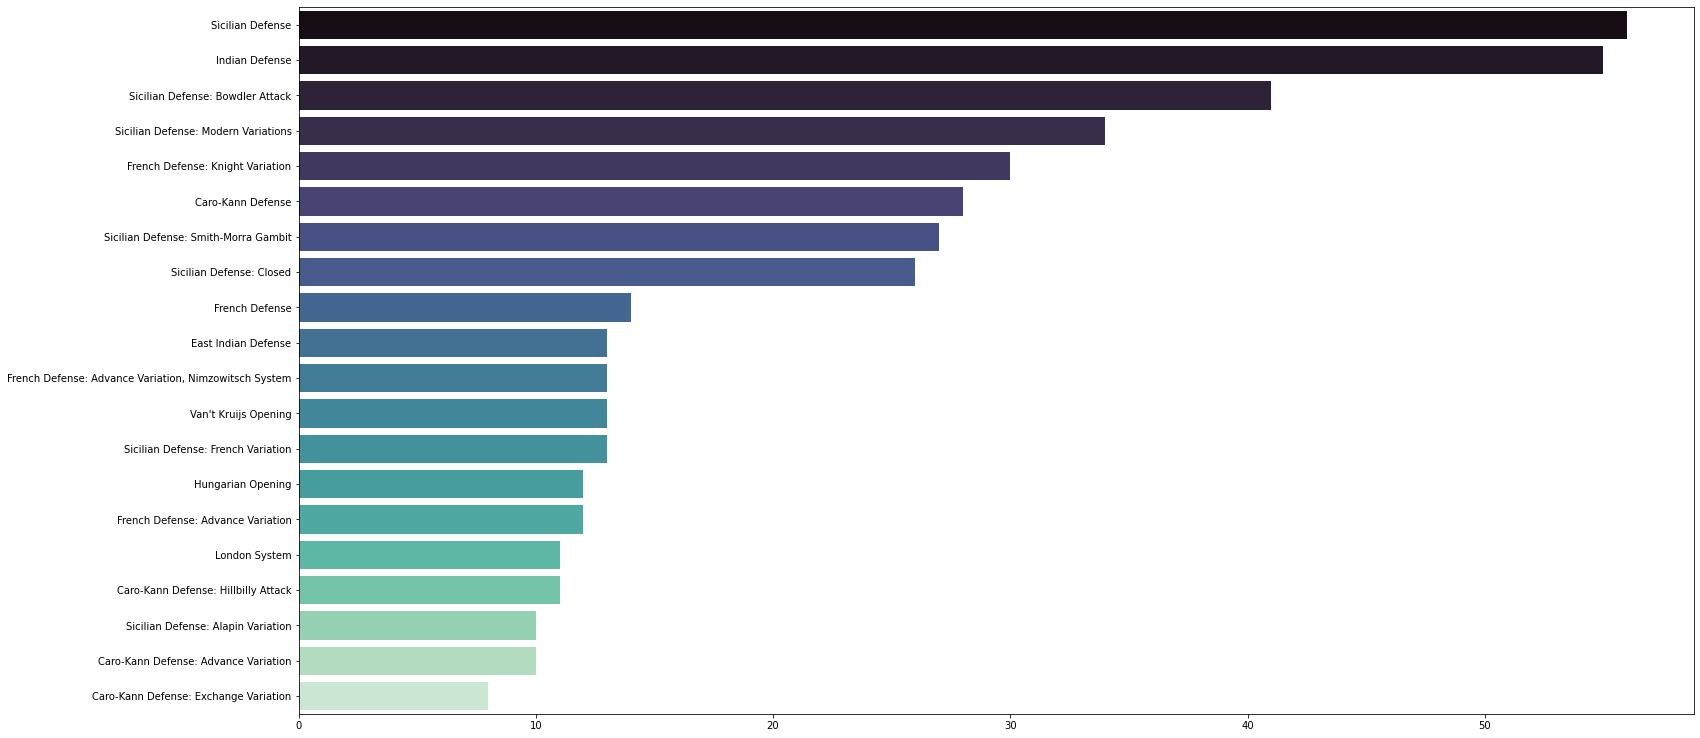

In [25]:
fig, ax = plt.subplots(figsize=(25, 13))
ax = sns.barplot(x=playing_black['opening_name'].value_counts().values[0:20], 
                 y=playing_black['opening_name'].value_counts().index[0:20],
                 palette='mako')

### Most succesful openings as black

In [26]:
playing_black.loc[playing_black['winner']=='black', :].ECO.value_counts()[0:15]

B20    47
A45    37
C00    31
B50    23
B10    22
B23    18
A00    18
B21    17
C02    15
A48    13
B12    13
B40    12
C42     6
B13     5
B22     5
Name: ECO, dtype: int64

In [27]:
playing_black.loc[playing_black['winner']=='black', :].opening_name.value_counts()[0:15]

Indian Defense                                           28
Sicilian Defense                                         23
Sicilian Defense: Bowdler Attack                         22
Sicilian Defense: Closed                                 17
Sicilian Defense: Modern Variations                      17
Sicilian Defense: Smith-Morra Gambit                     14
Caro-Kann Defense                                        14
French Defense: Knight Variation                         11
French Defense: Advance Variation, Nimzowitsch System     9
French Defense                                            8
Caro-Kann Defense: Hillbilly Attack                       8
Sicilian Defense: French Variation                        7
Van't Kruijs Opening                                      6
London System                                             6
Hungarian Opening                                         5
Name: opening_name, dtype: int64

In [28]:
strip_opening_b2 = [str(x).split(':')[0] for x in playing_black.loc[playing_black['winner']=='black', :].opening_name.value_counts().index]
count_openings_b2 = [[x, strip_opening_b2.count(str(x))] for x in strip_opening_b2]
count_openings_unique_b2 = []

for l in count_openings_b2:
    if l not in count_openings_unique_b2:
        count_openings_unique_b2.append(l)
count_openings_unique_b2

[['Indian Defense', 6],
 ['Sicilian Defense', 31],
 ['Caro-Kann Defense', 10],
 ['French Defense', 13],
 ["Van't Kruijs Opening", 1],
 ['London System', 1],
 ['Hungarian Opening', 1],
 ['East Indian Defense', 1],
 ["Queen's Pawn Game", 6],
 ['Nimzo-Larsen Attack', 2],
 ['Russian Game', 3],
 ['Trompowsky Attack', 1],
 ['Old Indian Defense', 1],
 ['Paleface Attack', 1],
 ["King's Indian Defense", 10],
 ['Grünfeld Defense', 8],
 ['English Opening', 6],
 ["Queen's Pawn, Mengarini Attack", 1],
 ["Queen's Gambit Declined", 3],
 ['Neo-Grünfeld Defense', 2],
 ['Sodium Attack', 1],
 ['Torre Attack', 2],
 ['Polish Opening', 2],
 ['Amar Opening', 1],
 ['Bird Opening', 1],
 ['Nimzo-Indian Defense', 1],
 ['Zukertort Opening', 2],
 ["King's Indian Attack", 1],
 ['Bogo-Indian Defense', 1],
 ['Vienna Game', 2],
 ['Saragossa Opening', 1],
 ['Pirc Defense', 2],
 ['Scotch Game', 1],
 ['Four Knights Game', 1],
 ['Van Geet Opening', 2],
 ["Bishop's Opening", 1],
 ['Ruy Lopez', 2],
 ["King's Gambit Accepted

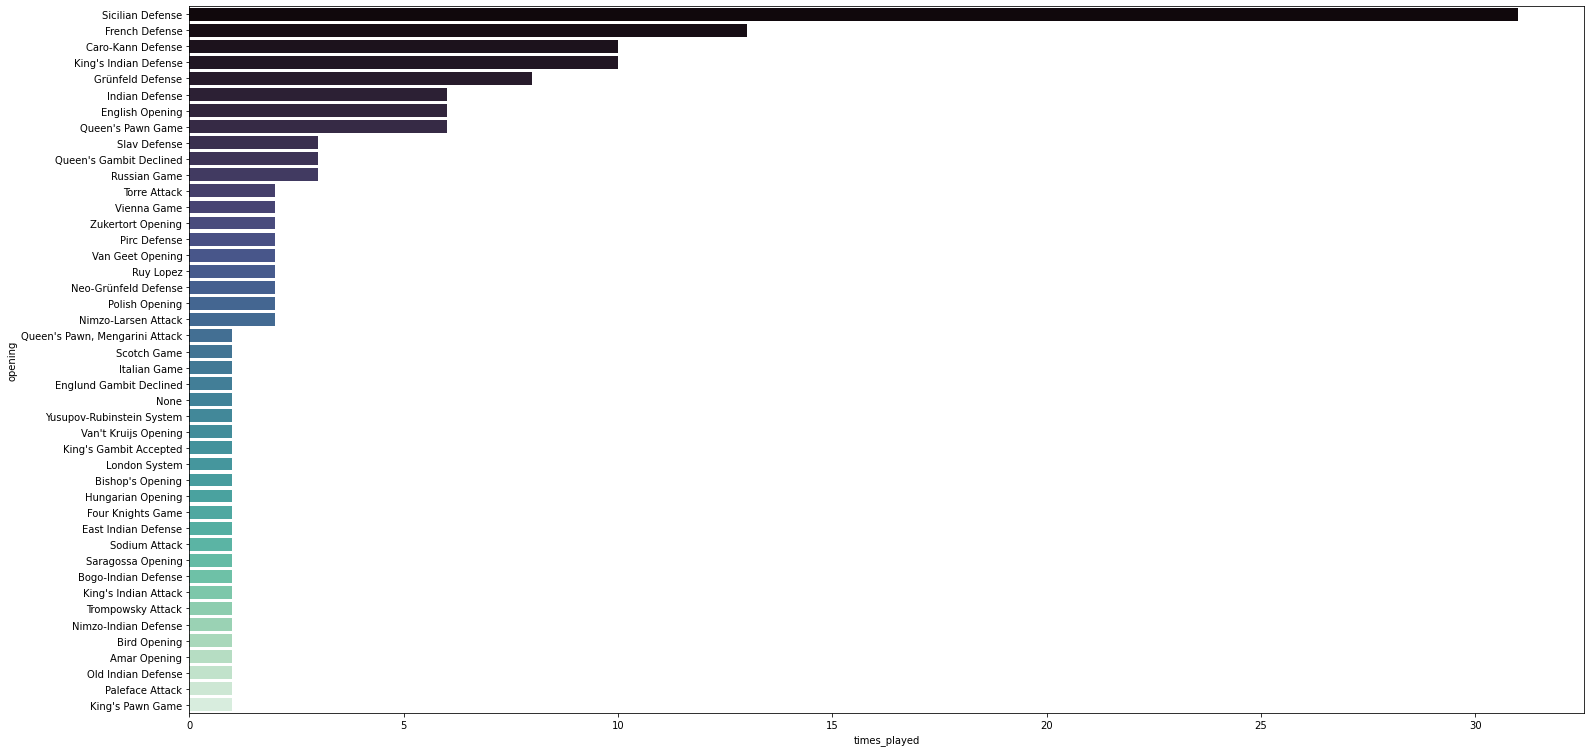

In [29]:
plot_df = pd.DataFrame(count_openings_unique_b2, columns=['opening', 'times_played'])
plot_df = plot_df.sort_values(by=['times_played'], ascending=False)

fig, ax = plt.subplots(figsize=(25, 13))
ax = sns.barplot(x=plot_df.times_played, 
                 y=plot_df.opening,
                 palette='mako')

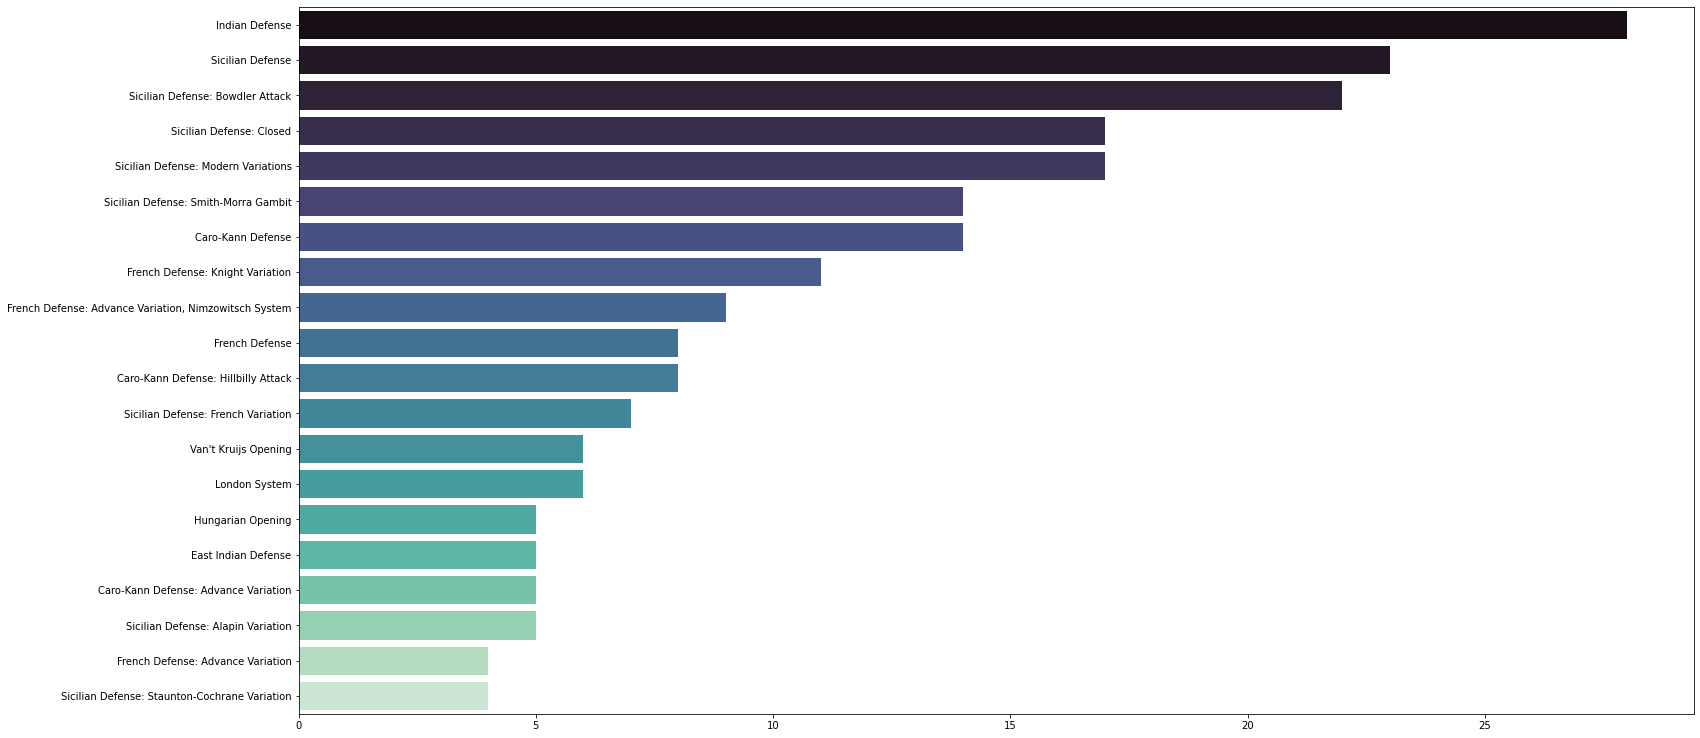

In [30]:
fig, ax = plt.subplots(figsize=(25, 13))
ax = sns.barplot(x=playing_black.loc[playing_black['winner']=='black', :].opening_name.value_counts().values[0:20], 
                 y=playing_black.loc[playing_black['winner']=='black', :].opening_name.value_counts().index[0:20],
                 palette='mako')

### ELO Curve

In [31]:
sorted_df = df.sort_values(by=['createdAt'])
sorted_df

,rated,variant,speed,perf,createdAt,status,winner,moves,clocks,clock,ECO,opening_name,white_player,rating,black_player,rating.1,pawn_opening
1651,True,standard,classical,classical,2019-04-09 12:29:18.450000+00:00,draw,NaN,c4 e5 Nc3 Bc5 e3 Nf6 Nge2 Nc6 g3 b6 Bg2 Bb7 d4...,"[90003, 90003, 90859, 91083, 91291, 90867, 921...","{'initial': 900, 'increment': 15, 'totalTime':...",A21,"English Opening: King's English Variation, Rev...",'chestroyer',1500,'mass1962',1510,english opening
1650,True,standard,rapid,rapid,2019-04-12 02:55:21.683000+00:00,mate,white,e4 c6 Bc4 d5 exd5 cxd5 Bb3 Bf5 d4 e6 h3 Nc6 c3...,"[60003, 60003, 59787, 59715, 59619, 59547, 595...","{'initial': 600, 'increment': 0, 'totalTime': ...",B10,Caro-Kann Defense: Hillbilly Attack,'cyote',1546,'chestroyer',1500,king pawn
1649,True,standard,rapid,rapid,2019-04-13 20:43:08.889000+00:00,mate,white,e4 c6 d4 d5 e5 e6 Nf3 Ne7 Nc3 Nd7 Bd3 f6 O-O N...,"[60003, 60003, 58923, 59843, 58747, 59355, 584...","{'initial': 600, 'increment': 0, 'totalTime': ...",B12,Caro-Kann Defense: Advance Variation,'emerson88',1386,'chestroyer',1346,king pawn
1648,True,standard,blitz,blitz,2019-04-13 20:54:06.845000+00:00,resign,black,c4 Nf6 Nc3 g6 g3 Bg7 Bg2 O-O e4 Re8 d3 d6 Nf3 ...,"[18003, 18003, 17579, 18003, 17419, 17963, 172...","{'initial': 180, 'increment': 0, 'totalTime': ...",A16,"English Opening: Anglo-Indian Defense, Queen's...",'chestroyer',1500,'dancab07',1506,english opening
1647,True,standard,rapid,rapid,2019-04-15 22:12:18.221000+00:00,timeout,white,e4 c5 Bc4 e6 e5 d5 Bb5+ Bd7 Bxd7+ Nxd7 c3 Nxe5...,"[60003, 60003, 59699, 58627, 59107, 56163, 581...","{'initial': 600, 'increment': 0, 'totalTime': ...",B20,Sicilian Defense: Bowdler Attack,'t-2wadbee-t',1241,'chestroyer',1241,king pawn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,True,standard,blitz,blitz,2023-05-17 23:14:03.641000+00:00,mate,white,e4 e5 Nf3 d6 d4 exd4 Bc4 Nf6 Qd3 Be7 c3 dxc3 N...,"[30003, 30003, 29915, 29883, 29755, 29611, 293...","{'initial': 300, 'increment': 0, 'totalTime': ...",C41,Philidor Defense: Morphy Gambit,'chestroyer',1429,'bmore1008',1425,king pawn
3,True,standard,blitz,blitz,2023-05-17 23:28:00.728000+00:00,resign,black,e4 e5 Nf3 Nc6 Bc4 Nf6 d4 exd4 O-O Bc5 Re1 O-O ...,"[30003, 30003, 29827, 29795, 29715, 29379, 295...","{'initial': 300, 'increment': 0, 'totalTime': ...",C55,"Italian Game: Scotch Gambit, Max Lange Attack",'joservega',1465,'chestroyer',1435,king pawn
2,True,standard,blitz,blitz,2023-05-17 23:33:19.245000+00:00,resign,black,e4 e5 Nf3 d6 d4 Nd7 Bc4 h6 O-O Ngf6 Re1 Qe7 Nc...,"[30003, 30003, 29923, 29851, 29771, 29571, 295...","{'initial': 300, 'increment': 0, 'totalTime': ...",C41,Philidor Defense: Hanham Variation,'chestroyer',1441,'kimura4',1391,king pawn
1,True,standard,blitz,blitz,2023-05-17 23:43:32.743000+00:00,mate,black,e4 c5 Nf3 e6 d4 cxd4 Nxd4 Nc6 Nxc6 bxc6 Bc4 d5...,"[30003, 30003, 29883, 29723, 29883, 29547, 298...","{'initial': 300, 'increment': 0, 'totalTime': ...",B44,Sicilian Defense: Taimanov Variation,'kimura4',1398,'chestroyer',1435,king pawn


In [32]:
sorted_df['moves'][1]

'e4 c5 Nf3 e6 d4 cxd4 Nxd4 Nc6 Nxc6 bxc6 Bc4 d5 exd5 cxd5 Bb3 Nf6 O-O Be7 Nc3 O-O a3 Ba6 Re1 Qc7 Bd2 d4 Ne4 Nxe4 Rxe4 Bb7 Rxd4 Bc5 Rg4 Rfd8 g3 Qc6 Kf1 Qg2+ Ke2 Qf3+ Ke1 Qxf2#'

In [33]:
rating = player_rating(player_name, df)
rating = pd.DataFrame(rating, columns=['createdAt', 'speed', 'rating'])
rating = rating.sort_values(['createdAt'])
rating['rating'] = clean_rating(rating)
rating

,createdAt,speed,rating
1651,2019-04-09,classical,1500
1650,2019-04-12,rapid,1500
1648,2019-04-13,blitz,1500
1649,2019-04-13,rapid,1346
1647,2019-04-15,rapid,1241
...,...,...,...
4,2023-05-17,blitz,1429
3,2023-05-17,blitz,1435
2,2023-05-17,blitz,1441
1,2023-05-17,blitz,1435


In [34]:
rating['rating'] = rating['rating'].astype('int32')
rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652 entries, 1651 to 0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   createdAt  1652 non-null   object
 1   speed      1652 non-null   object
 2   rating     1652 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 45.2+ KB


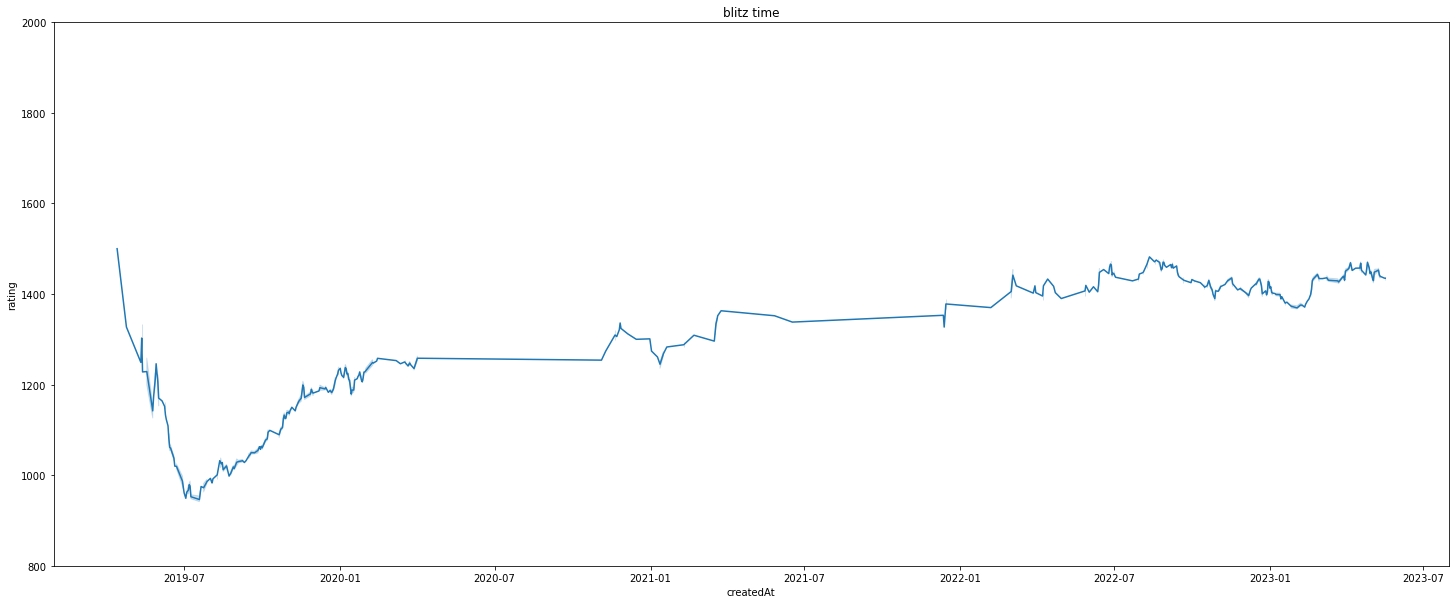

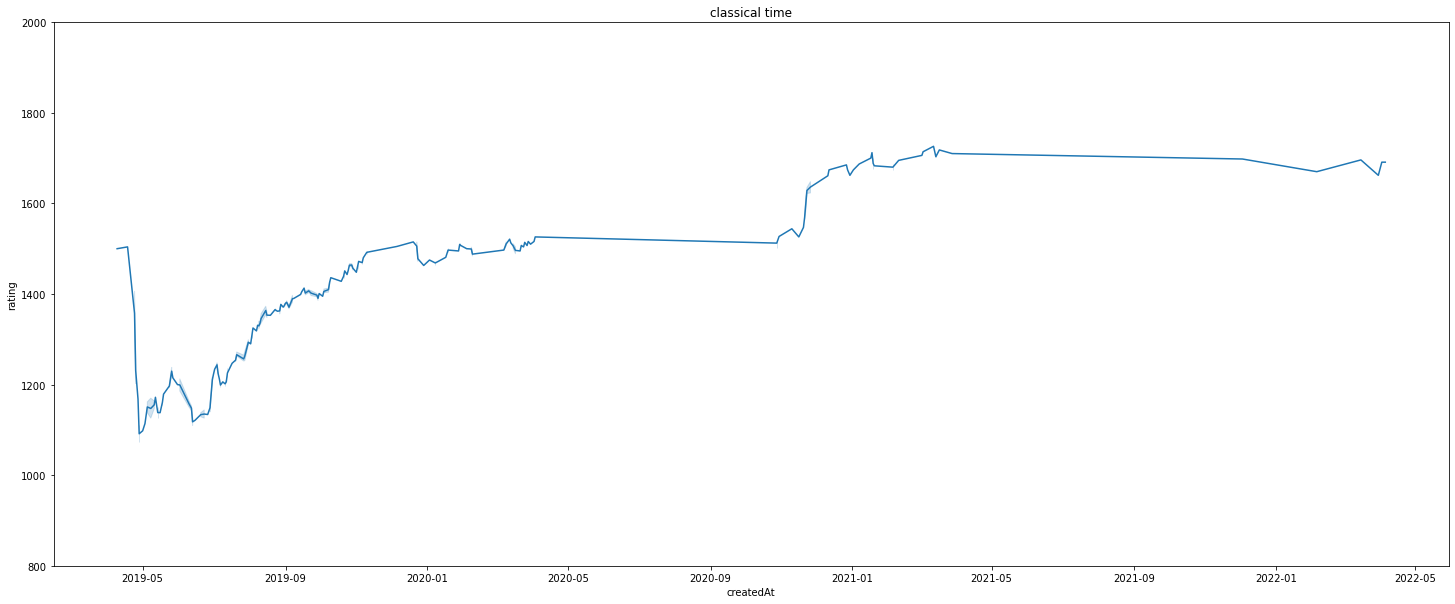

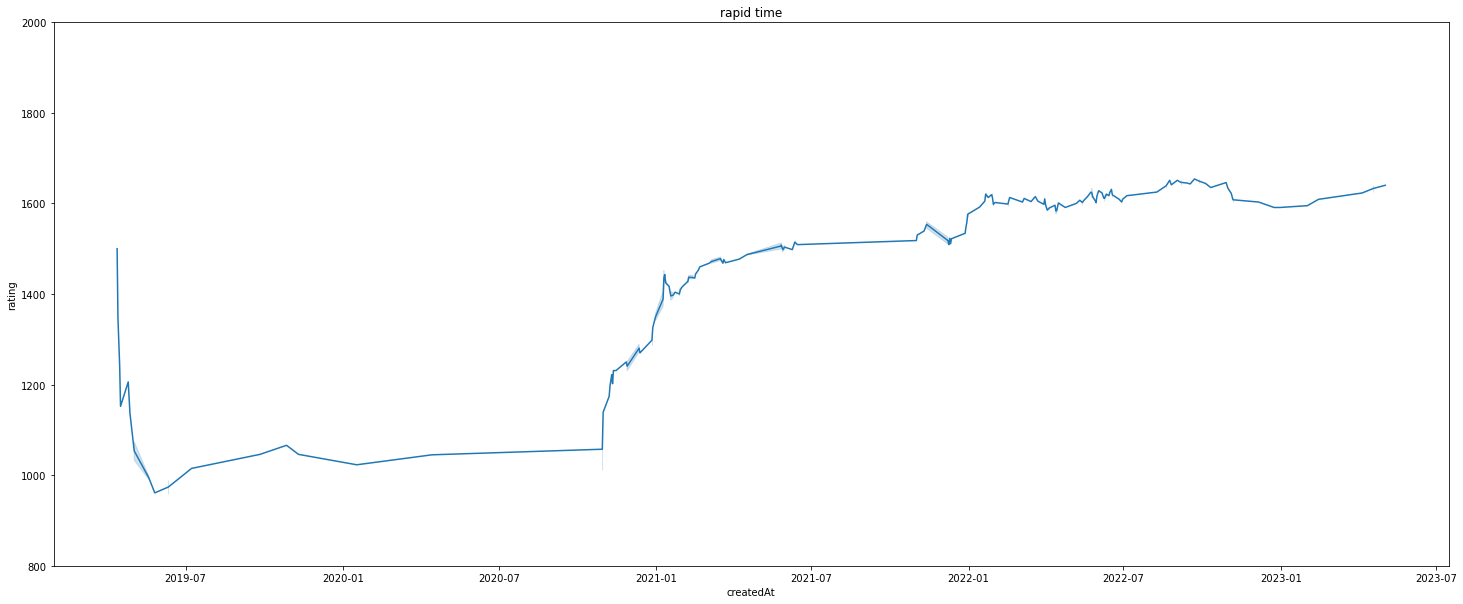

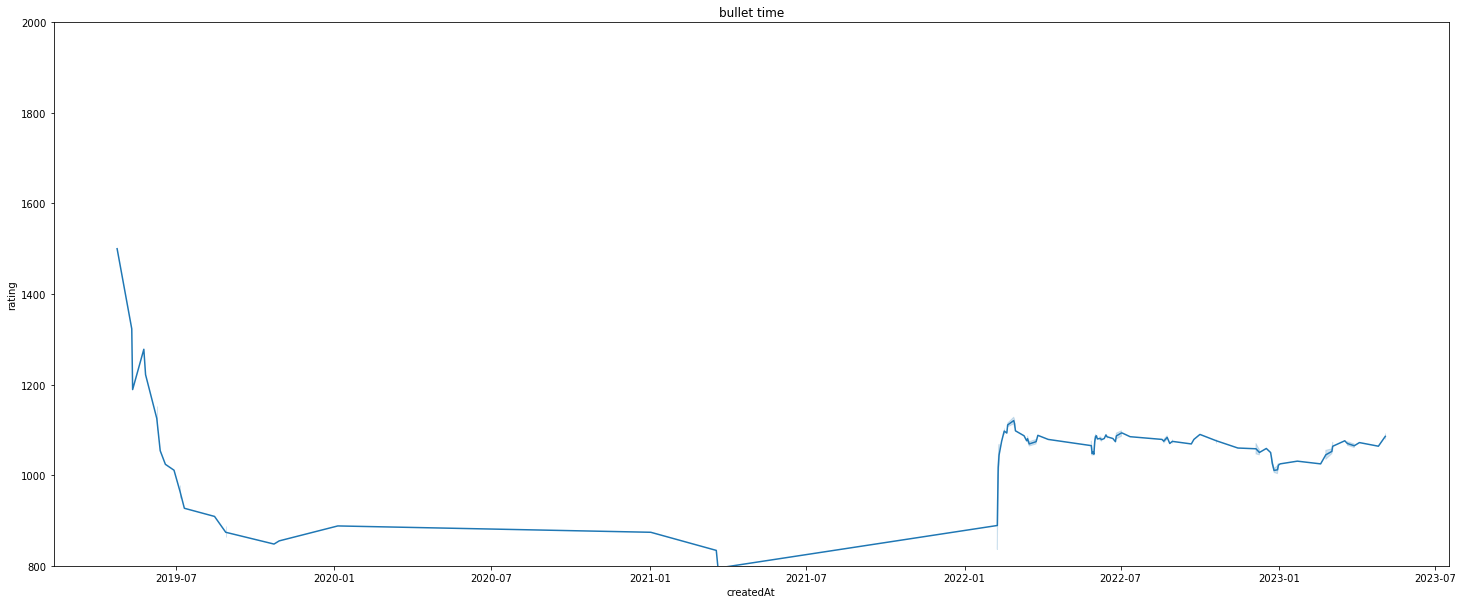

In [35]:
speed = [item for item in rating.speed.value_counts().index]
for item in speed[0:-1]:
    fig, ax = plt.subplots(figsize=(25, 10))
    ax = sns.lineplot(x=rating.loc[rating['speed']==item, :].createdAt, y=rating.loc[rating['speed']==item, :].rating)
    plt.title(f'{item} time')
    plt.ylim(800, 2000)

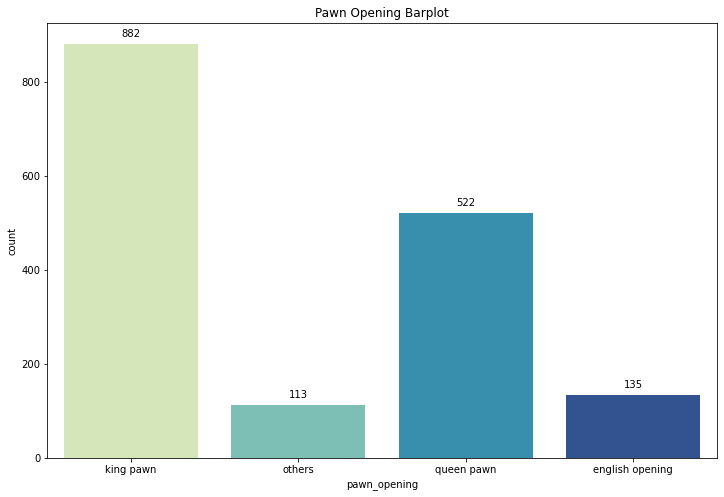

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(data=df, x='pawn_opening', palette='YlGnBu')
plt.title(f'Pawn Opening Barplot')
add_value_labels(ax)